<h1 style="color:teal">Goal</h1>

In this notebook, we aim to clean the Older Adults with Cancer Clinic (OACC) database for future use.

<h1 style="color:teal">Setup</h1>

<h2 style="color:lightseagreen">Imports</h2>

In [1]:
# Imports
# from IPython.display import display
import pandas as pd
import seaborn as sns

from oacc_package.constants import (
    col_snake_map,
    column_tree,
    typo_corrections
)

from oacc_package.info import (
    list_info_topics,
    display_info
)

from oacc_package.data_cleaning import (
    read_access_table,
    make_column_tree_widget,
    display_column_tree,
    display_column_tree_,
    map_oacc_values,
    update_hematologic_stage,
    make_functional_status,
    filter_oacc_cohort
)

from oacc_package.eda import (
    build_baseline_characteristics,
    plot_referrals_by_year,
    plot_stage_distribution,
    plot_disease_site_organ_sunburst
)

<h2 style="color:lightseagreen">Paths</h2>

In [2]:
# Define paths
db_path = r"/cluster/home/t128190uhn/datasets/oacc/raw/raw_oacc_db.parquet"

<h2 style="color:lightseagreen">Display setup</h2>

In [3]:
# Adjust display options to ensure all rows and columns are shown
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.expand_frame_repr = False

<h2 style="color:lightseagreen">Context</h2>

In [4]:
# list all available info topics
list_info_topics()

['disease_stages', 'referral_criteria']

In [5]:
# display the markdown blurb for user-specified topic
display_info("referral_criteria")

**Referral Criteria**

- Age ≥ 65 **AND**
- “Active” cancer diagnosis **AND at least one of the following:**
  - Perceived increased vulnerability to adverse effects of cancer treatment  
  - Impaired functional status  
  - Impaired mobility (e.g., falls)  
  - Cognitive impairment  
  - Polypharmacy  
  - Multiple comorbidities  



<h1 style="color:teal">Data preparation</h1>

<h2 style="color:lightseagreen">Read Data</h2>

In [6]:
# Read data
df = pd.read_parquet(db_path)

<h2 style="color:lightseagreen">Schema standardization</h2>

In [7]:
# Rename columns in-place
df.rename(columns=col_snake_map, inplace=True)

In [8]:
# Display Column Tree
# display_column_tree_(column_tree)

<h2 style="color:lightseagreen">Value mapping</h2>

In [9]:
# Apply mappings: bucket VES-13 (<3/≥3), map domain/rec/treatment_impact columns, and add 'mapped_<col>' columns (originals preserved).
df = map_oacc_values(df)

In [10]:
# Set disease_stage = 'Hematologic' for heme sites (Leukemia/Lymphoma/Myeloma)
df = update_hematologic_stage(df)

<h2 style="color:lightseagreen">Create derived column</h2>

In [11]:
# Create functional_status and mapped_functional_status from IADLs/Phys status
df = make_functional_status(df)

<h2 style="color:lightseagreen">Standardize disease_organ values</h2>

In [12]:
# Standardize disease_organ text (convert to string, trim spaces, lowercase, and fix known typos)
df["disease_organ"] = (df["disease_organ"].astype(str).str.strip().str.lower().replace(typo_corrections))

<h1 style="color:teal">Filter cohort</h1>

In [13]:
# Apply filters
filtered_df, counts =  filter_oacc_cohort(df, apply_first_appt_filter=False, apply_date_referred=False)

Total records in the OACC database:
 2989
Records after excluding patients with a status other than 'New patient':
 2266
Records after excluding occasional patients under 65:
 2252
Records after excluding patients with incomplete assessments:
 2250
Records after excluding patients who were not referred for pre-treatment advice:
 1580
Records after excluding patients for whom the treatment impact was not applicable or who experienced unique circumstances:
 1464
Records after excluding patients for whom CARG score is not NA:
 676


<h1 style="color:teal">Data Exploration</h1>

<h2 style="color:lightseagreen">Baseline characteristics</h2> 

In [14]:
# Generate baseline characteristics table from the filtered cohort and save to CSV
baseline = build_baseline_characteristics(filtered_df, save_csv="/cluster/home/t128190uhn/datasets/oacc/cleaned/baseline_characteristics.csv")
baseline

,Characteristics,Values,Total patients
0,"Age, mean (SD), years",,80.32 (6.2)
1,Gender,Female,350 (51.8)
2,Gender,Male,326 (48.2)
3,Treatment intent,Palliative,323 (47.8)
4,Treatment intent,Curative,307 (45.4)
5,Treatment intent,Unknown,35 (5.2)
6,Treatment intent,Neo/adjuvant,11 (1.6)
7,Treatment stage,Pre-treatment,465 (68.8)
8,Treatment stage,Pre-treatment new modality,211 (31.2)
9,Disease stage,Metastatic,237 (35.1)


<h2 style="color:lightseagreen">Number of referrals</h2> 

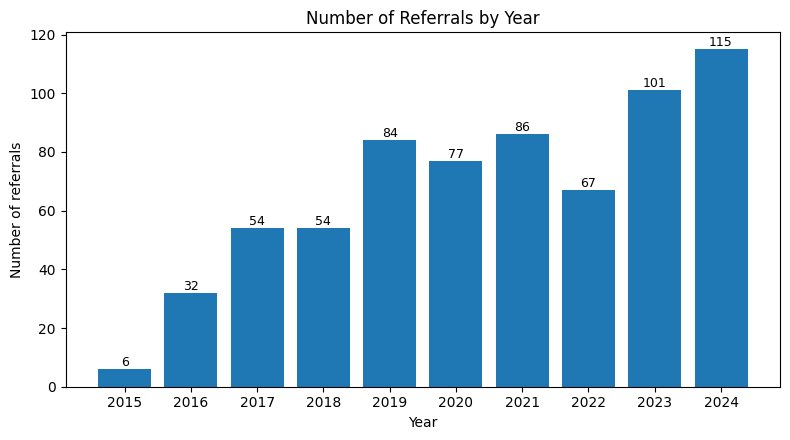

In [15]:
# raw rows per year, limit years, and save a PNG
plot_referrals_by_year(filtered_df, distinct_mrn=False, min_year=2015, max_year=2024, save_path="referrals_by_year.png")

<h2 style="color:lightseagreen">Disease Site vs Disease Stage Heatmap</h2> 

<Axes: xlabel='disease_stage', ylabel='disease_site'>

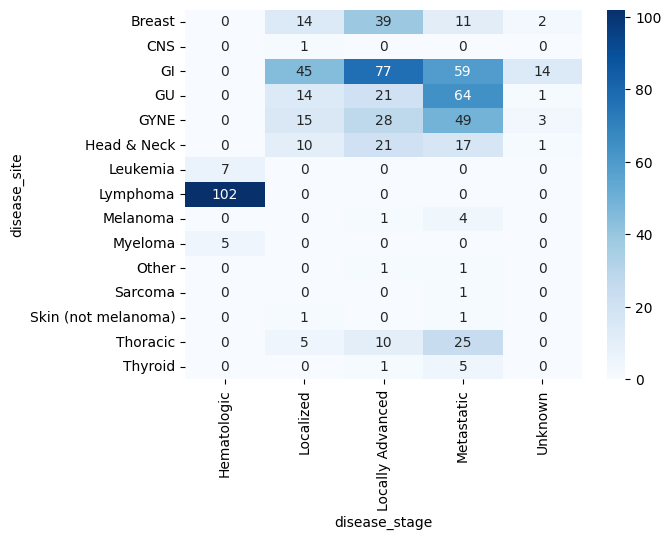

In [16]:
temp = pd.crosstab(filtered_df["disease_site"], filtered_df["disease_stage"])
sns.heatmap(temp, annot=True, fmt="d", cmap="Blues")

<h2 style="color:lightseagreen">Stage Breakdown by Disease Site (Stacked Percent Chart)</h2> 

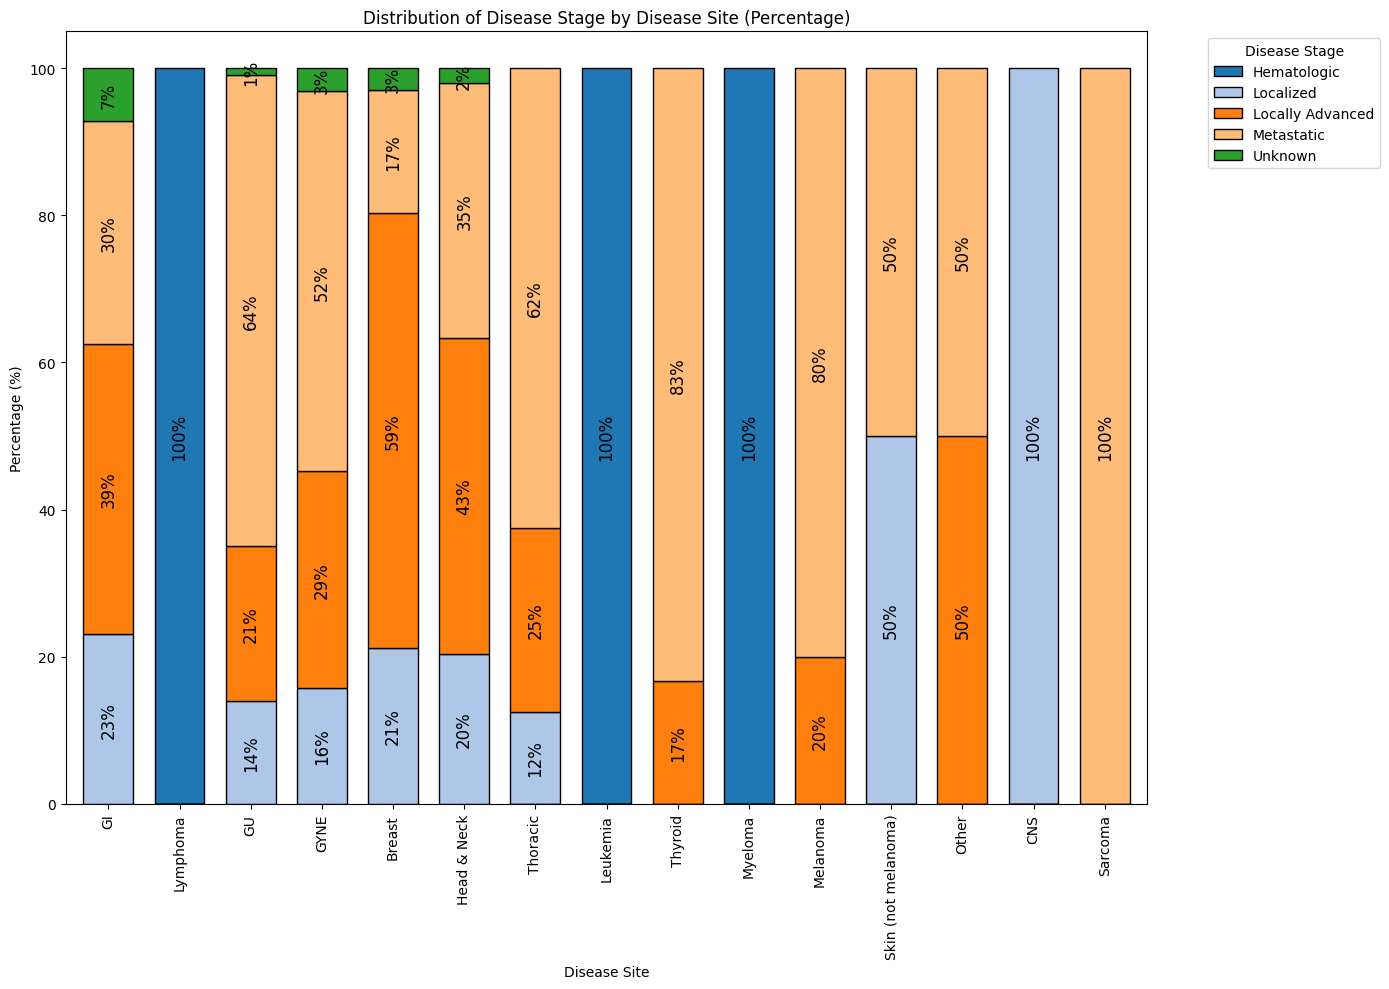

In [17]:
plot_stage_distribution(filtered_df)

<h2 style="color:lightseagreen">Hierarchy of Disease Site and Disease Organ</h2> 

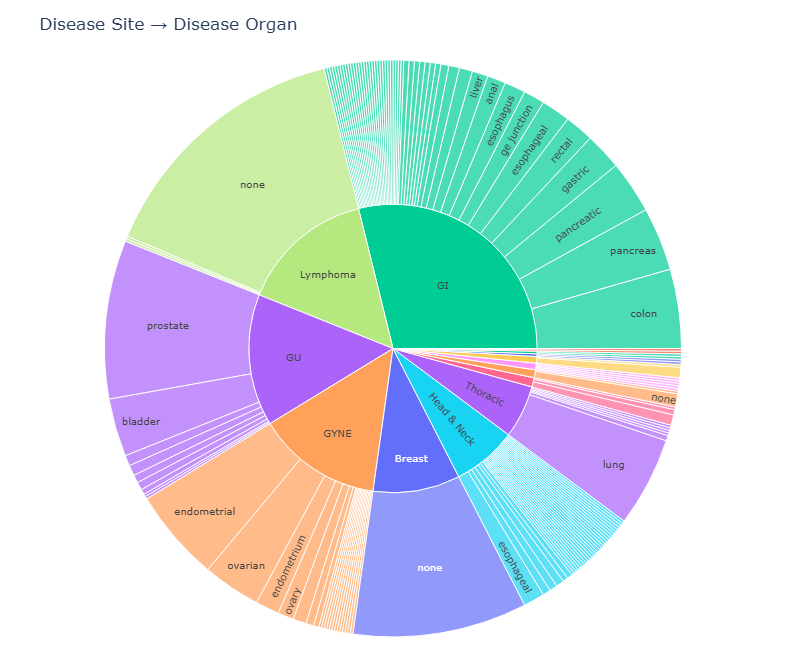

In [18]:
plot_disease_site_organ_sunburst(filtered_df, save_path="/cluster/home/t128190uhn/datasets/oacc/eda/disease_site_organ_sunburst.html")

In [19]:
# Crosstab of referral reasons by treatment intent
pd.crosstab(filtered_df["referral_reason"], filtered_df["treatment_intent"])

treatment_intent,Curative,Neo/adjuvant,Palliative,Unknown
referral_reason,,,,
Cognition,1,0,1,0
Geriatric issues - broad,0,0,2,0
Geriatric issues - specified,0,0,4,0
Treatment decision making,306,11,316,35


<h1 style="color:teal">Save output</h1>

In [20]:
# Save the filtered dataframe to CSV
filtered_df.to_csv("/cluster/home/t128190uhn/datasets/oacc/cleaned/cleaned_and_filtered_oacc_data.csv", index=False)